In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import re
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
data= pd.read_csv("bikes (1).csv")

In [19]:
data.info()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3589 non-null   int64 
 1   Model Name  3589 non-null   object
 2   Price       3589 non-null   object
 3   CC          3533 non-null   object
 4   Mileage     3559 non-null   object
 5   Weight      3589 non-null   object
 6   Links       3589 non-null   object
dtypes: int64(1), object(6)
memory usage: 196.4+ KB


Unnamed: 0    3589
Model Name    3589
Price         3589
CC            3533
Mileage       3559
Weight        3589
Links         3589
dtype: int64

# Data Cleaning

In [20]:
data.drop("Links",axis=1,inplace=True)
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight
0,0,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg
1,1,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg
2,2,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg
3,3,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg
4,4,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg
...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,"₹ 1,84,374",349.0 CC,37 Km/l,195 Kg
3585,3585,Yamaha MT-15,"₹ 1,44,900",155.0 CC,48 Km/l,138 Kg
3586,3586,Honda Dio,"₹ 64,510",109.5 CC,55 Km/l,103 Kg
3587,3587,Honda SP 125,"₹ 78,381",124.0 CC,65 Km/l,117 Kg


In [27]:
# Displaying the Duplicates Records

data[data.duplicated()]

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight


In [28]:
# Dropping the Duplicates Records

data.drop_duplicates(keep='first',inplace= True)
data.count()

Unnamed: 0    3589
Model Name    3589
Price         3589
CC            3533
Mileage       3559
Weight        3589
dtype: int64

In [29]:
# Creating  a new column called "Brands" from an  column "Model Name" from the data set . 

data['Brand']= data['Model Name'].apply(lambda model: model.split()[0])
data


,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand
0,0,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg,Royal
1,1,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg,Royal
2,2,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg,Royal
3,3,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg,Royal
4,4,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,"₹ 1,84,374",349.0 CC,37 Km/l,195 Kg,Royal
3585,3585,Yamaha MT-15,"₹ 1,44,900",155.0 CC,48 Km/l,138 Kg,Yamaha
3586,3586,Honda Dio,"₹ 64,510",109.5 CC,55 Km/l,103 Kg,Honda
3587,3587,Honda SP 125,"₹ 78,381",124.0 CC,65 Km/l,117 Kg,Honda


In [30]:
data['Brand']= data['Brand'].replace({'Royal':'Royal Enfield'})
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand
0,0,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg,Royal Enfield
1,1,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg,Royal Enfield
2,2,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg,Royal Enfield
3,3,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg,Royal Enfield
4,4,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,"₹ 1,84,374",349.0 CC,37 Km/l,195 Kg,Royal Enfield
3585,3585,Yamaha MT-15,"₹ 1,44,900",155.0 CC,48 Km/l,138 Kg,Yamaha
3586,3586,Honda Dio,"₹ 64,510",109.5 CC,55 Km/l,103 Kg,Honda
3587,3587,Honda SP 125,"₹ 78,381",124.0 CC,65 Km/l,117 Kg,Honda


In [31]:
# Extracting values from "Price" column

data['Price']=data.Price.apply(lambda value: int(''.join(re.findall(r'\d+',value))))
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand
0,0,Royal Enfield Himalayan,210784,411.0 CC,45 Km/l,191 Kg,Royal Enfield
1,1,Royal Enfield Classic Chrome,188868,499.0 CC,27 Km/l,194 Kg,Royal Enfield
2,2,Royal Enfield Meteor 350,205844,349.0 CC,41.88 Km/l,183 Kg,Royal Enfield
3,3,Royal Enfield Bullet 350,127094,346.0 CC,45 Km/l,183 Kg,Royal Enfield
4,4,Hero Splendor +,69380,97.2 CC,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,184374,349.0 CC,37 Km/l,195 Kg,Royal Enfield
3585,3585,Yamaha MT-15,144900,155.0 CC,48 Km/l,138 Kg,Yamaha
3586,3586,Honda Dio,64510,109.5 CC,55 Km/l,103 Kg,Honda
3587,3587,Honda SP 125,78381,124.0 CC,65 Km/l,117 Kg,Honda


In [32]:
# Extracting values from "CC" column

data.loc[data.CC.notnull(),'CC']= data.loc[data.CC.notnull(),'CC'].apply(lambda cc: int(float(cc.split()[0])))
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand
0,0,Royal Enfield Himalayan,210784,411,45 Km/l,191 Kg,Royal Enfield
1,1,Royal Enfield Classic Chrome,188868,499,27 Km/l,194 Kg,Royal Enfield
2,2,Royal Enfield Meteor 350,205844,349,41.88 Km/l,183 Kg,Royal Enfield
3,3,Royal Enfield Bullet 350,127094,346,45 Km/l,183 Kg,Royal Enfield
4,4,Hero Splendor +,69380,97,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,184374,349,37 Km/l,195 Kg,Royal Enfield
3585,3585,Yamaha MT-15,144900,155,48 Km/l,138 Kg,Yamaha
3586,3586,Honda Dio,64510,109,55 Km/l,103 Kg,Honda
3587,3587,Honda SP 125,78381,124,65 Km/l,117 Kg,Honda


In [33]:
# Extracting values from "Mileage" column

data.loc[data.Mileage.notnull(),"Mileage"]=data.loc[data.Mileage.notnull(),"Mileage"].apply(lambda ml:int(float(ml.split()[0])))
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand
0,0,Royal Enfield Himalayan,210784,411,45,191 Kg,Royal Enfield
1,1,Royal Enfield Classic Chrome,188868,499,27,194 Kg,Royal Enfield
2,2,Royal Enfield Meteor 350,205844,349,41,183 Kg,Royal Enfield
3,3,Royal Enfield Bullet 350,127094,346,45,183 Kg,Royal Enfield
4,4,Hero Splendor +,69380,97,70,110 Kg,Hero
...,...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,184374,349,37,195 Kg,Royal Enfield
3585,3585,Yamaha MT-15,144900,155,48,138 Kg,Yamaha
3586,3586,Honda Dio,64510,109,55,103 Kg,Honda
3587,3587,Honda SP 125,78381,124,65,117 Kg,Honda


In [34]:
# Extracting values from "Weight" column

data["Weight"]=data.Weight.apply(lambda w:int(float(w.split()[0])))
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand
0,0,Royal Enfield Himalayan,210784,411,45,191,Royal Enfield
1,1,Royal Enfield Classic Chrome,188868,499,27,194,Royal Enfield
2,2,Royal Enfield Meteor 350,205844,349,41,183,Royal Enfield
3,3,Royal Enfield Bullet 350,127094,346,45,183,Royal Enfield
4,4,Hero Splendor +,69380,97,70,110,Hero
...,...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,184374,349,37,195,Royal Enfield
3585,3585,Yamaha MT-15,144900,155,48,138,Yamaha
3586,3586,Honda Dio,64510,109,55,103,Honda
3587,3587,Honda SP 125,78381,124,65,117,Honda


In [35]:
# Create a new column called "Electric" from an existing column "CC"

data["Electric"]=np.where(data.CC.isnull(),1,0) # 0- Non-Electric, 1- Electric
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand,Electric
0,0,Royal Enfield Himalayan,210784,411,45,191,Royal Enfield,0
1,1,Royal Enfield Classic Chrome,188868,499,27,194,Royal Enfield,0
2,2,Royal Enfield Meteor 350,205844,349,41,183,Royal Enfield,0
3,3,Royal Enfield Bullet 350,127094,346,45,183,Royal Enfield,0
4,4,Hero Splendor +,69380,97,70,110,Hero,0
...,...,...,...,...,...,...,...,...
3584,3584,Royal Enfield Classic 350,184374,349,37,195,Royal Enfield,0
3585,3585,Yamaha MT-15,144900,155,48,138,Yamaha,0
3586,3586,Honda Dio,64510,109,55,103,Honda,0
3587,3587,Honda SP 125,78381,124,65,117,Honda,0


# Missing Values


In [36]:
data.isnull().sum()

Unnamed: 0     0
Model Name     0
Price          0
CC            56
Mileage       30
Weight         0
Brand          0
Electric       0
dtype: int64

In [37]:
# Replacing NaN to 'N/A' in the "CC" column 
data.CC.fillna('N/A',inplace= True) 
data.CC.isnull().sum()

0

# After analysing the dataset we came to know that all the missing values in Mileage column, shows that there are no mileage value for the bikes and these bikes are elctric bikes as we can see in mileage column we have km/Full Charge instead of km/l

In [38]:
# Finding average mileage of electric bikes to fill the missing values in the "Mileage" column
# electric bikes mean :- 112 km/full charge approx
# non-electric bikes mean:- 32 km/l approx

data.groupby('Electric')['Mileage'].mean()

Electric
0     50.583571
1    111.981132
Name: Mileage, dtype: object

In [39]:
# Replacing NaN to 112 in the "Mileage" column since we found out the average mileage of electric bikes is 112 km/full charge approx

data['Mileage']=data['Mileage'].fillna(112)
data.Mileage.isnull().sum()

0

In [40]:
# Final check  whether ther are any missing values

data.isnull().sum()

Unnamed: 0    0
Model Name    0
Price         0
CC            0
Mileage       0
Weight        0
Brand         0
Electric      0
dtype: int64

# Sorting Data

In [41]:
# Sorting the data in ascending order according to the "Model Name" column

data.sort_values(by ='Model Name', ascending = 1,inplace=True)
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand,Electric
368,368,22Kymco Flow,74740,N/A,160,85,22Kymco,1
233,233,Ampere Magnus,45999,N/A,45,94,Ampere,1
285,285,Ampere Magnus Pro,79966,N/A,75,94,Ampere,1
198,198,Ampere Reo,44838,N/A,45,70,Ampere,1
351,351,Ampere Reo Elite,47264,N/A,55,68,Ampere,1
...,...,...,...,...,...,...,...,...
55,55,Yamaha YZF R1,2039233,998,20,200,Yamaha,0
54,54,Yamaha YZF R15 V4.0,170800,155,45,142,Yamaha,0
169,169,Yezdi Adventure,209900,334,112,188,Yezdi,0
100,100,Yezdi Roadster,198142,334,112,184,Yezdi,0


In [42]:
# Resetting the index locations since the indices is not changed because of sorting

data.reset_index(drop=True,inplace=True)
data

,Unnamed: 0,Model Name,Price,CC,Mileage,Weight,Brand,Electric
0,368,22Kymco Flow,74740,N/A,160,85,22Kymco,1
1,233,Ampere Magnus,45999,N/A,45,94,Ampere,1
2,285,Ampere Magnus Pro,79966,N/A,75,94,Ampere,1
3,198,Ampere Reo,44838,N/A,45,70,Ampere,1
4,351,Ampere Reo Elite,47264,N/A,55,68,Ampere,1
...,...,...,...,...,...,...,...,...
3584,55,Yamaha YZF R1,2039233,998,20,200,Yamaha,0
3585,54,Yamaha YZF R15 V4.0,170800,155,45,142,Yamaha,0
3586,169,Yezdi Adventure,209900,334,112,188,Yezdi,0
3587,100,Yezdi Roadster,198142,334,112,184,Yezdi,0


In [43]:
# Rearranging all the columns in order

data= data[['Brand','Model Name','Electric','CC','Price','Mileage','Weight']]
data

,Brand,Model Name,Electric,CC,Price,Mileage,Weight
0,22Kymco,22Kymco Flow,1,N/A,74740,160,85
1,Ampere,Ampere Magnus,1,N/A,45999,45,94
2,Ampere,Ampere Magnus Pro,1,N/A,79966,75,94
3,Ampere,Ampere Reo,1,N/A,44838,45,70
4,Ampere,Ampere Reo Elite,1,N/A,47264,55,68
...,...,...,...,...,...,...,...
3584,Yamaha,Yamaha YZF R1,0,998,2039233,20,200
3585,Yamaha,Yamaha YZF R15 V4.0,0,155,170800,45,142
3586,Yezdi,Yezdi Adventure,0,334,209900,112,188
3587,Yezdi,Yezdi Roadster,0,334,198142,112,184


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       3589 non-null   object
 1   Model Name  3589 non-null   object
 2   Electric    3589 non-null   int64 
 3   CC          3589 non-null   object
 4   Price       3589 non-null   int64 
 5   Mileage     3589 non-null   int64 
 6   Weight      3589 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 196.4+ KB


# Data Analysis

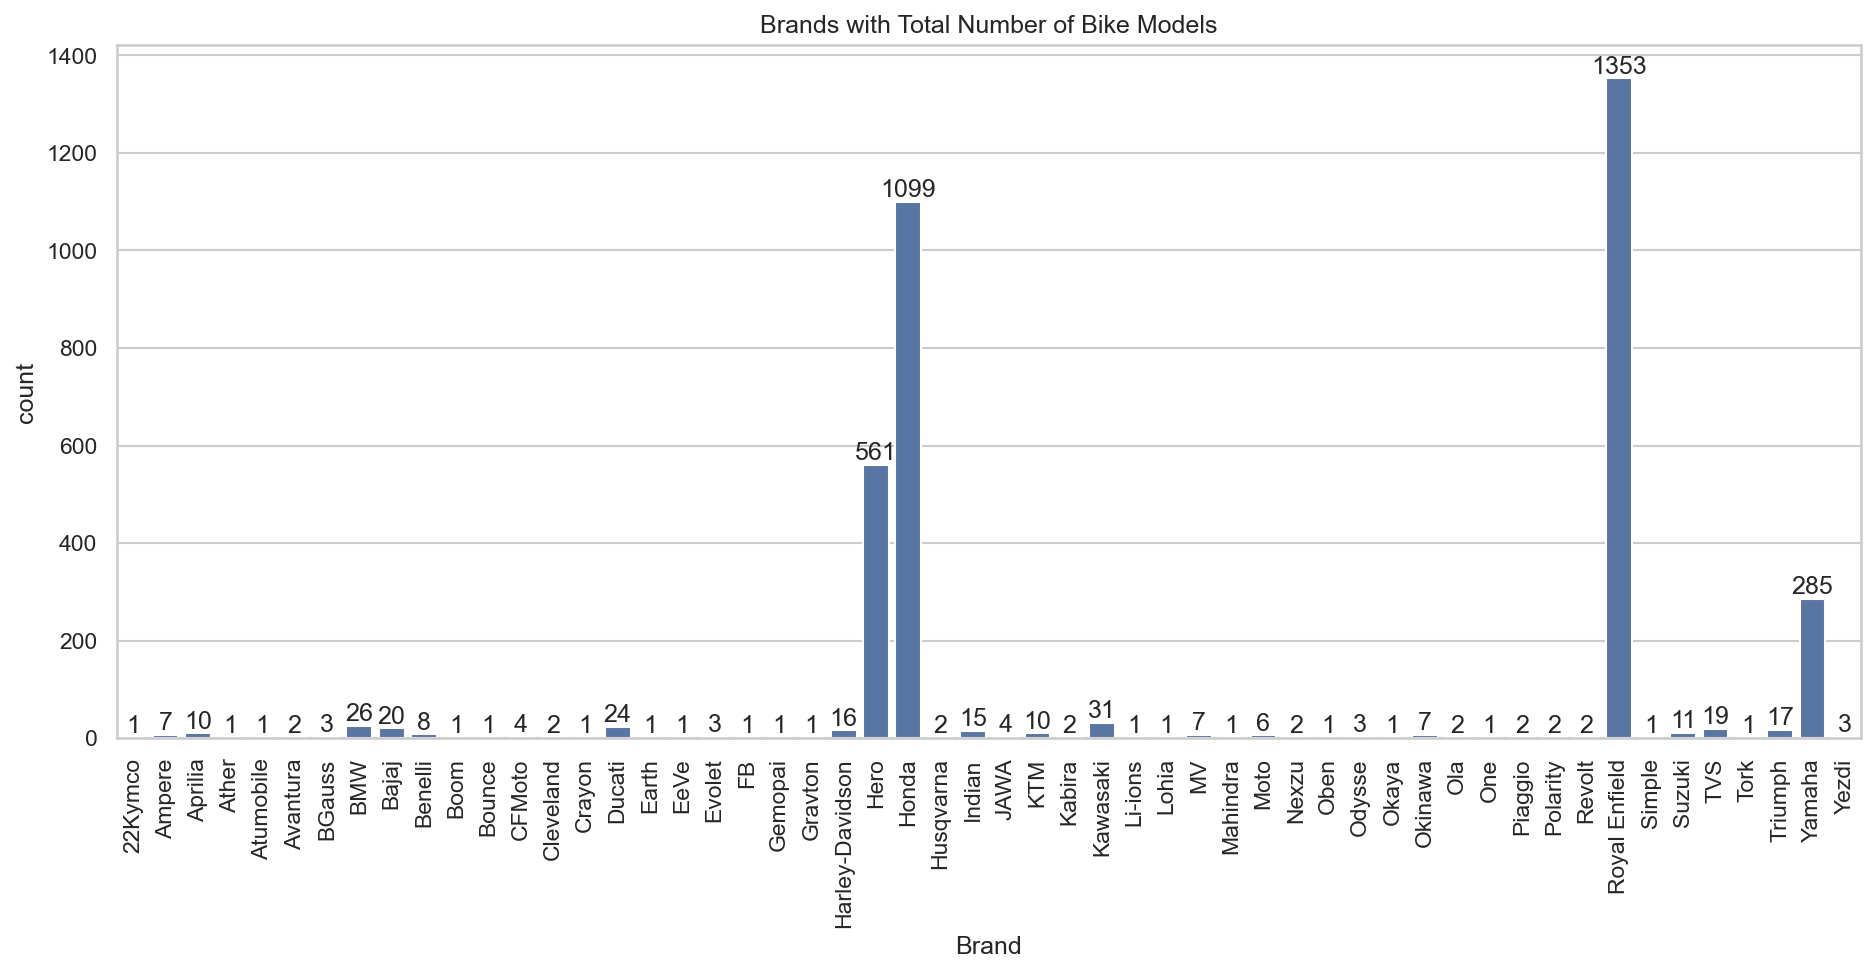

In [45]:
# Brands with Total Number of Bike Model

plt.figure(figsize=(15,6),dpi=150)
ax=sns.countplot(data= data,x=data['Brand'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.title("Brands with Total Number of Bike Models")
plt.show()

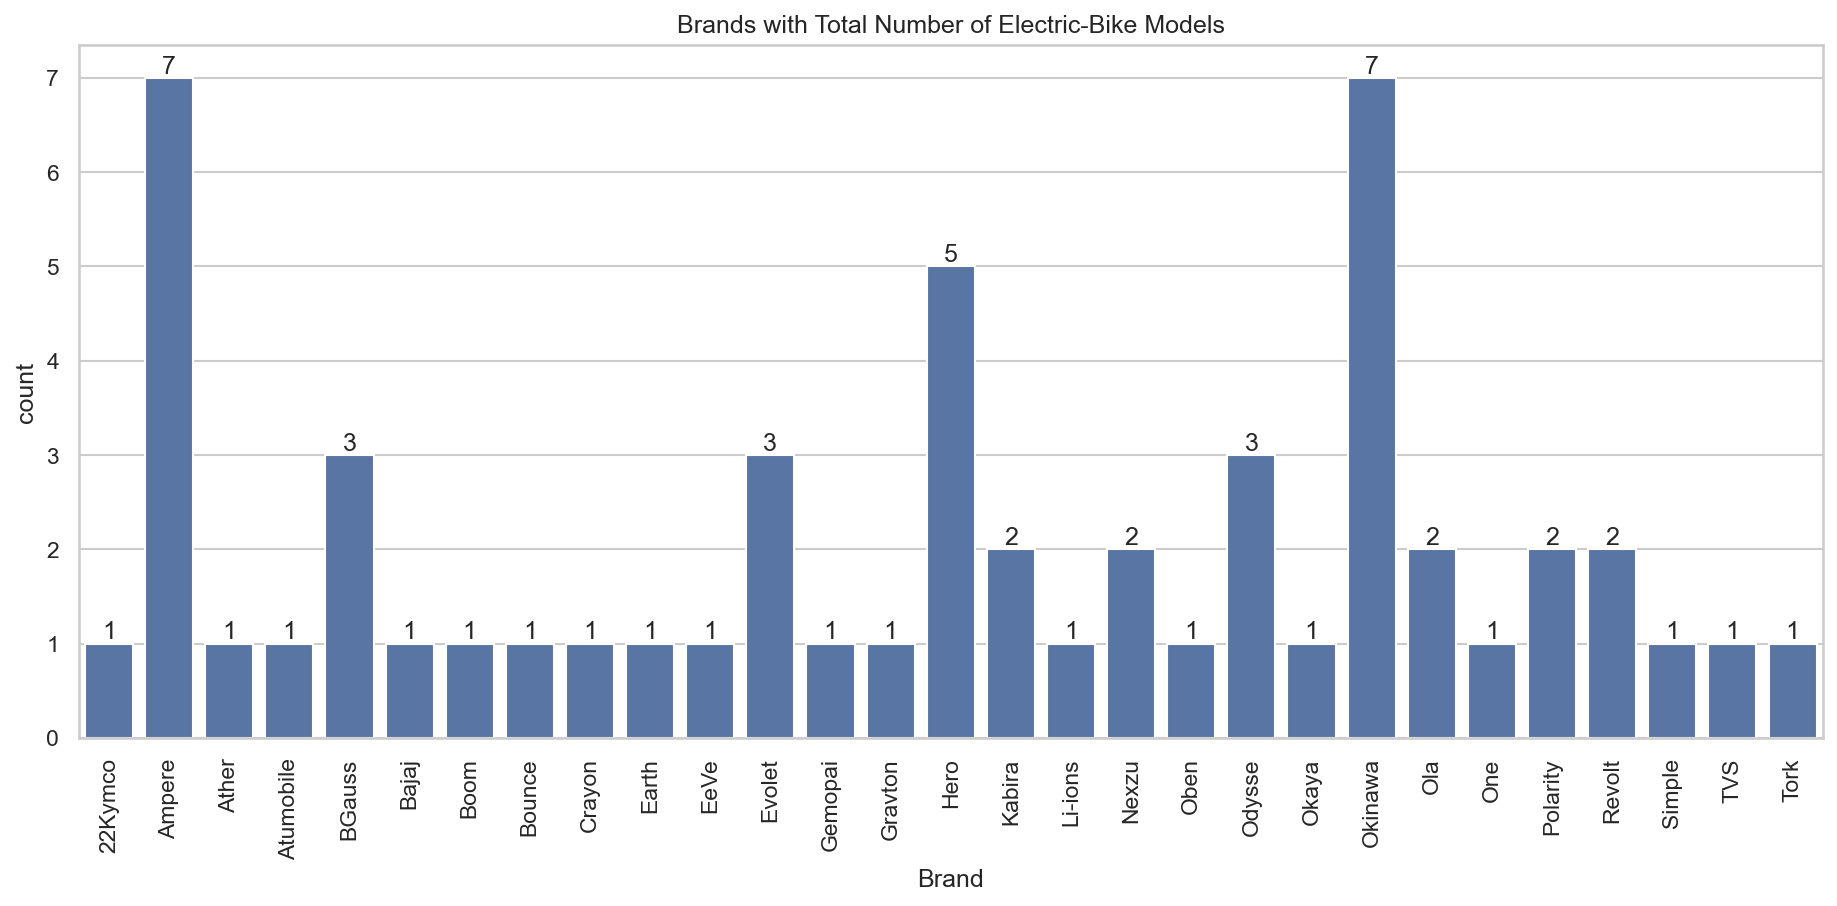

In [46]:
# Brands with Total Number of Electric-Bike Models
plt.figure(figsize=(15,6),dpi=150)
ax=sns.countplot(data= data[data['Electric']==1],x='Brand')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.title("Brands with Total Number of Electric-Bike Models")
plt.show()

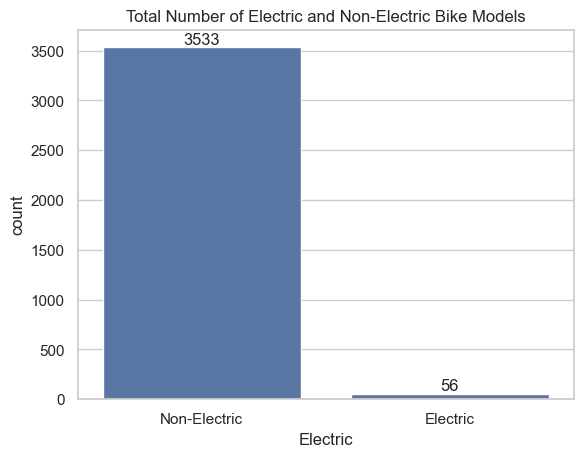

In [47]:
# Total Number of Electric and Non-Electric Bike Models
ax=sns.countplot(data=data, x="Electric")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks([0,1],['Non-Electric','Electric'])
plt.title("Total Number of Electric and Non-Electric Bike Models")
plt.show()

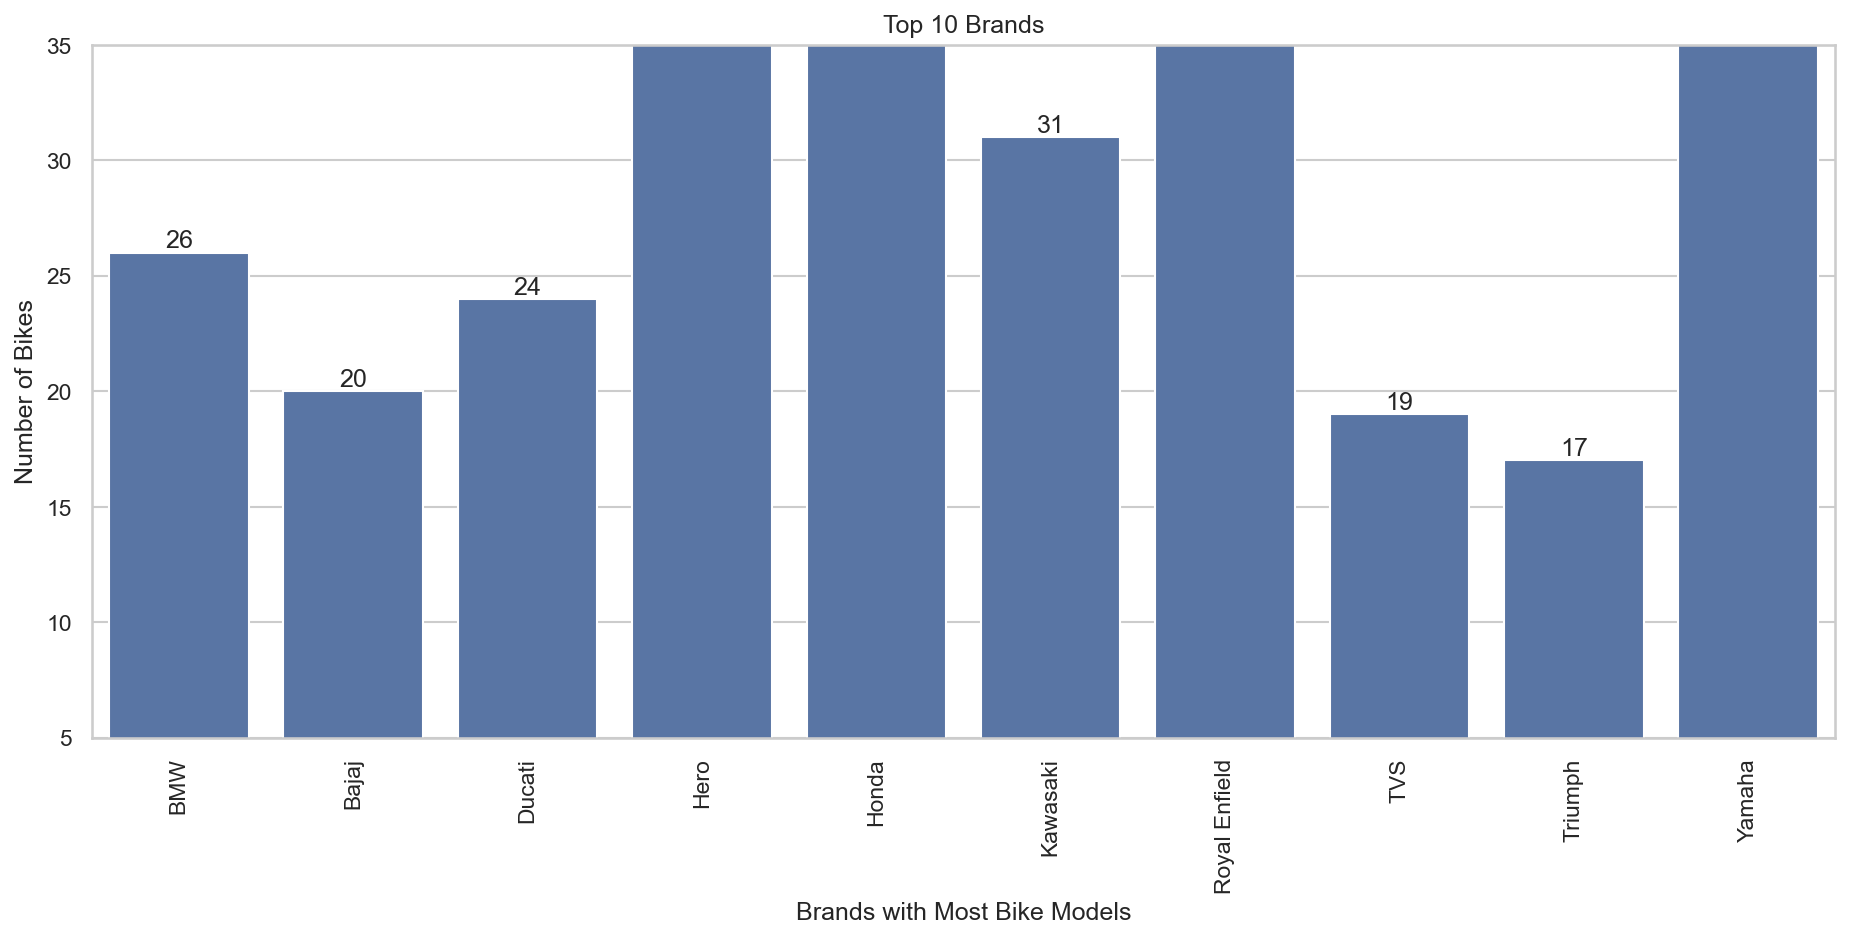

In [48]:
# Top 10 Bike Brands according to the sale 
top10Brand= data['Brand'].value_counts().head(10)

plt.figure(figsize=(15,6),dpi=150)
ax=sns.countplot(x= data.loc[data['Brand'].isin(top10Brand.index),'Brand'])
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(5,35)
plt.xlabel("Brands with Most Bike Models")
plt.xticks(rotation=90)
plt.ylabel('Number of Bikes')
plt.title("Top 10 Brands")
plt.show()

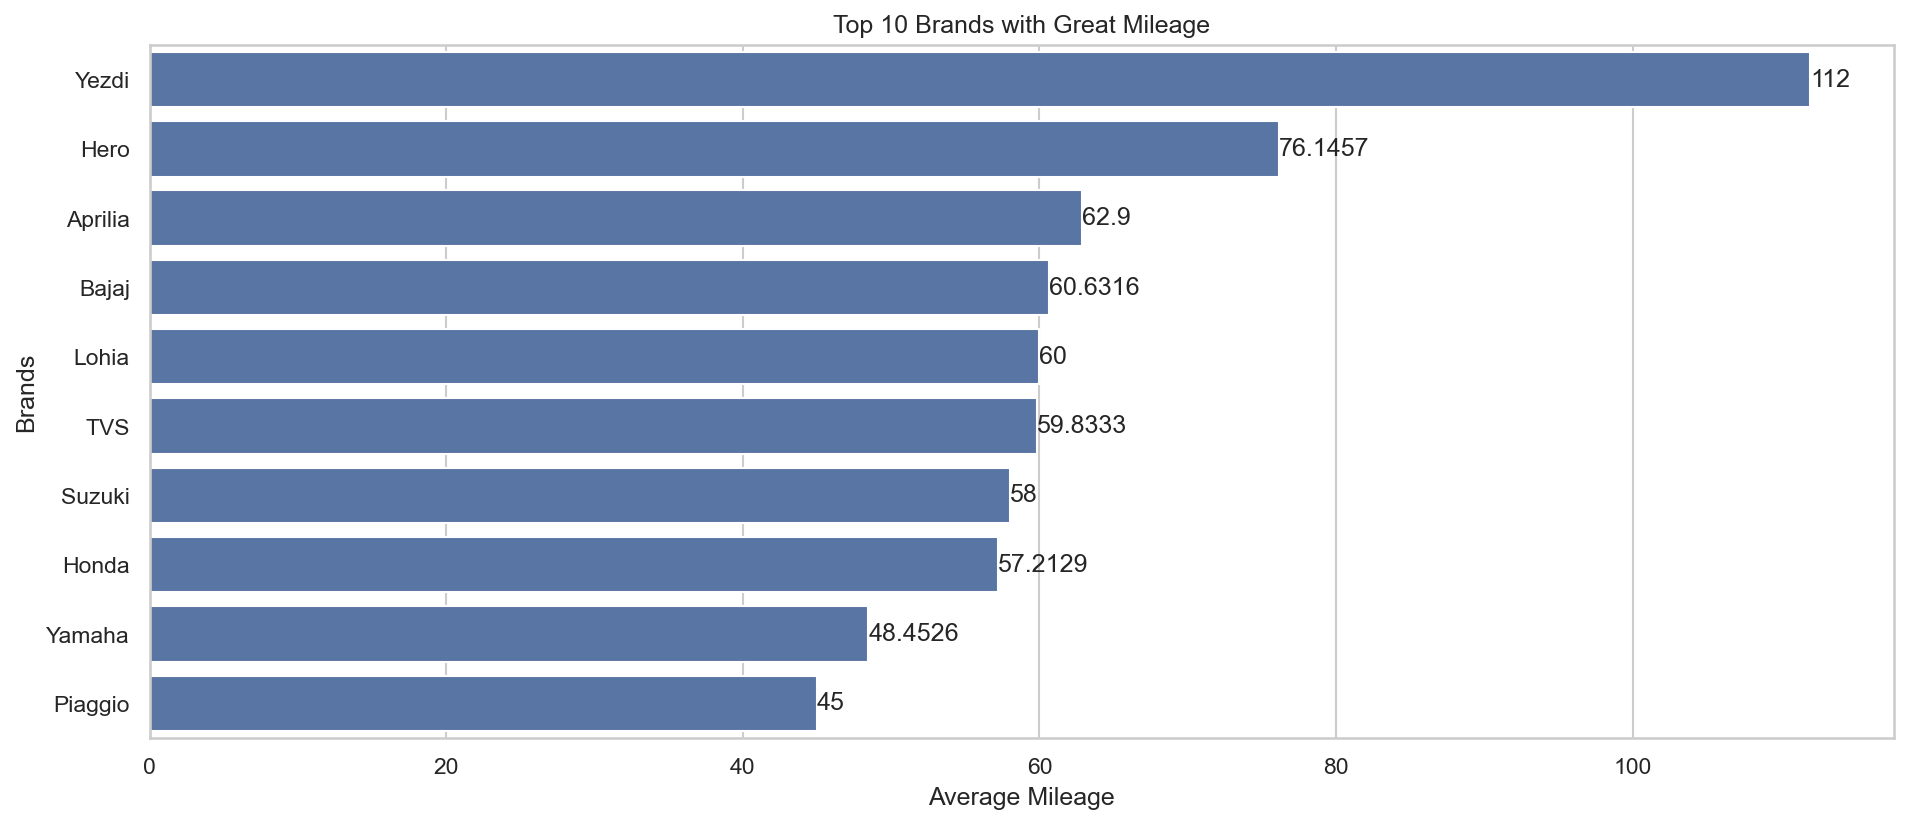

In [49]:
# Top 10 Brands with Great Mileage
top10Mileage= data[data['Electric']==0].groupby('Brand')['Mileage'].mean().nlargest(10)

plt.figure(figsize=(15,6),dpi=150)
ax= sns.barplot(y=top10Mileage.index,x= top10Mileage.values,orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Brands")
plt.xlabel('Average Mileage')
plt.title("Top 10 Brands with Great Mileage")
plt.show()

/var/folders/b1/srlh_qq52858jg8m9qm6jlrh0000gn/T/ipykernel_5348/1457354519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CC'] = pd.to_numeric(data['CC'], errors='coerce')


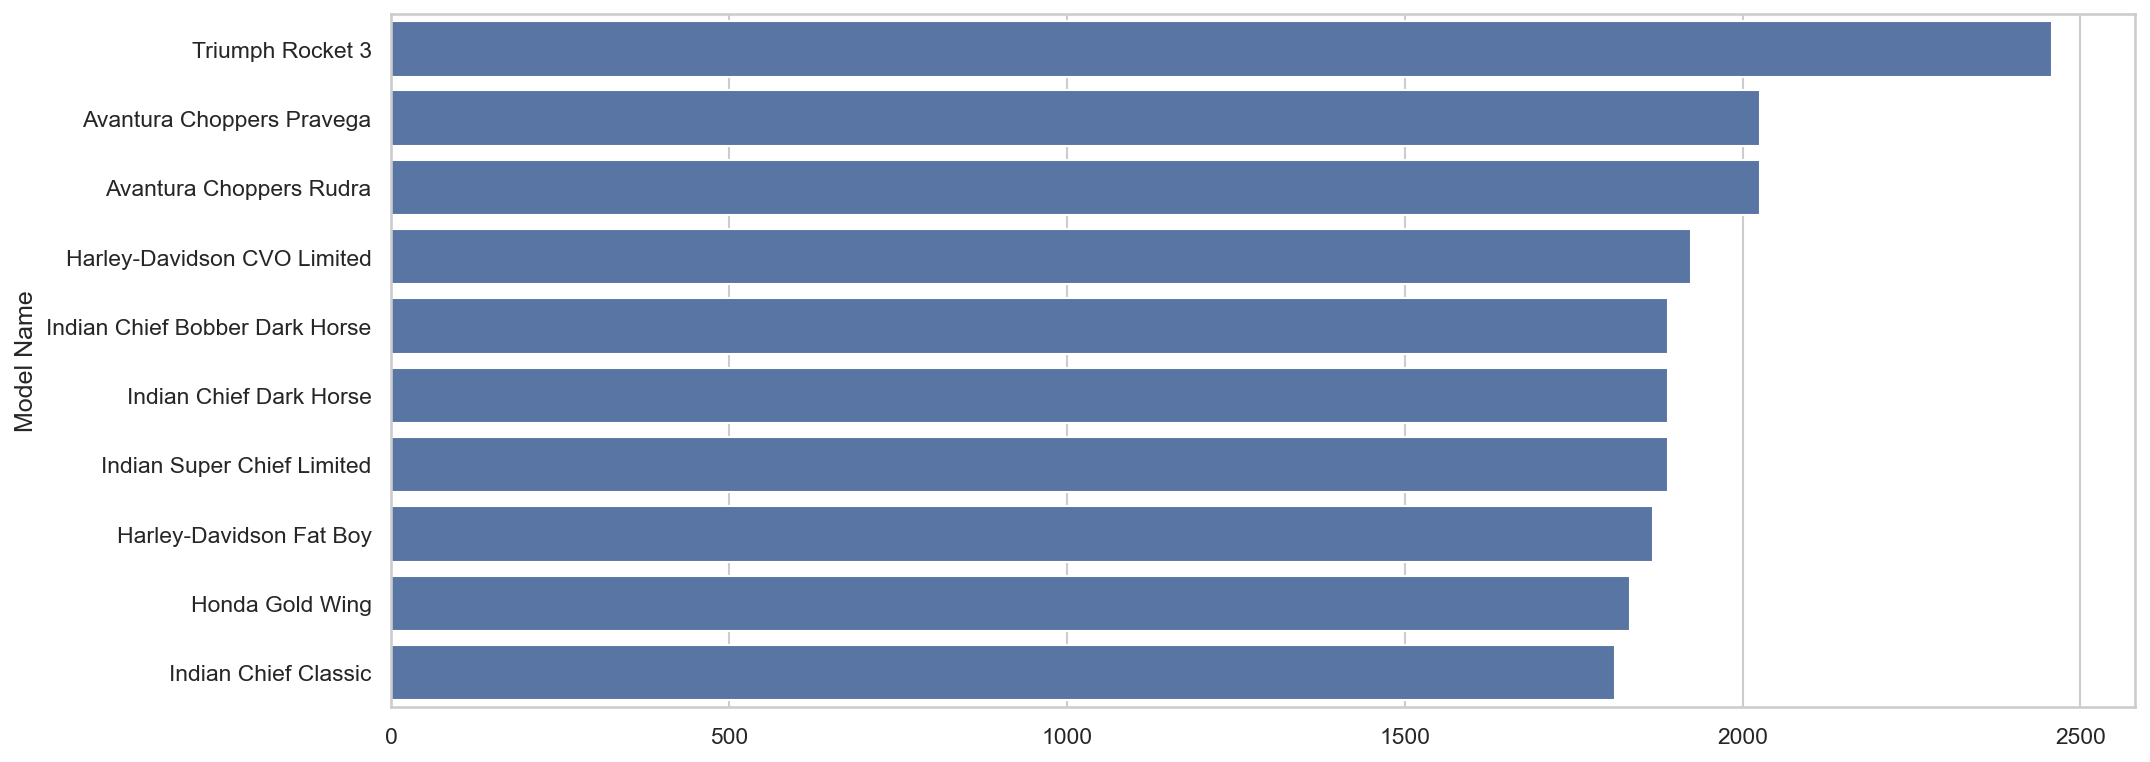

In [52]:
# Top 10 Bikes with Great CC
# Assuming 'data' is your DataFrame
# Convert the 'CC' column to numeric
data['CC'] = pd.to_numeric(data['CC'], errors='coerce')

# Top 10 Bikes with Great CC
top10CCBikes = data[data['Electric'] == 0].groupby('Model Name')['CC'].mean().nlargest(10)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6), dpi=150)
ax = sns.barplot(y=top10CCBikes.index, x=top10CCBikes.values, orient='h')
plt.show()


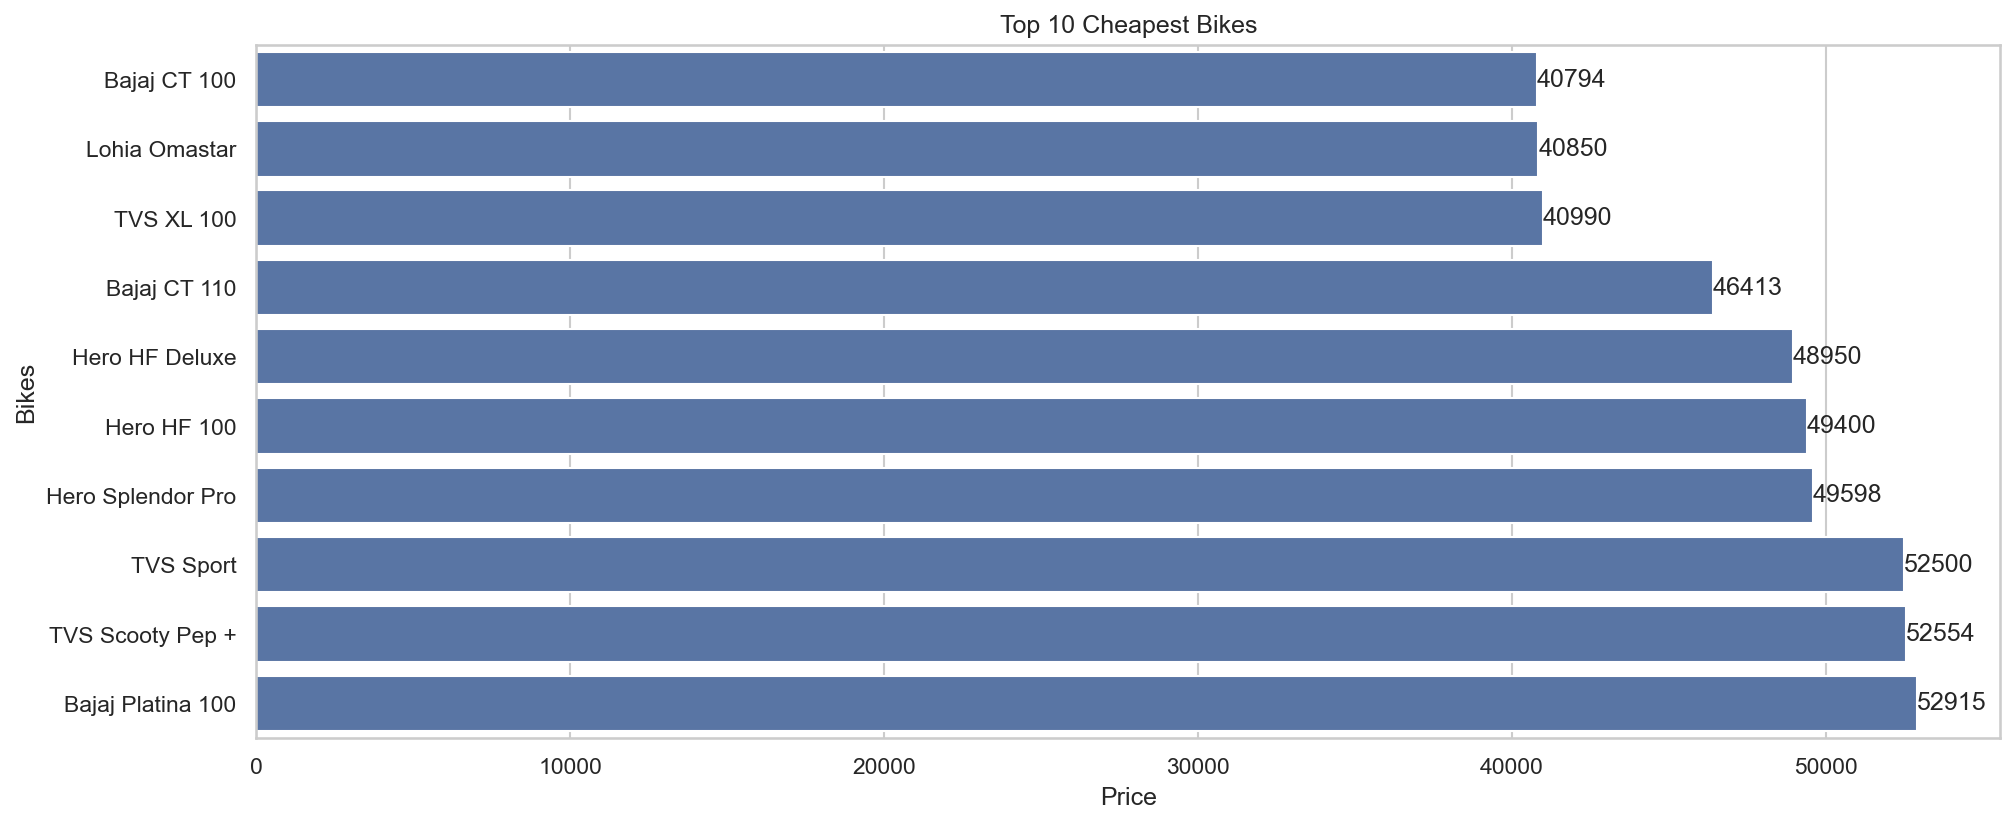

In [53]:
# Top 10 Cheapest Bikes
top10cheapBikes=data[data['Electric']==0].groupby('Model Name')['Price'].mean().nsmallest(10)

plt.figure(figsize=(15,6),dpi=150)
ax= sns.barplot(y=top10cheapBikes.index,x= top10cheapBikes.values,orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Bikes")
plt.xlabel('Price')
plt.title("Top 10 Cheapest Bikes")
plt.show()
